# Лабораторная №2
#### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

#### Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    - обработку пропусков в данных;
    - кодирование категориальных признаков;
    - масштабирование данных.

# Описание данных
* Date - Дата наблюдений
* Location - Название локации, в которой расположена метеорологическая станция
* MinTemp - Минимальная температура в градусах цельсия
* MaxTemp - Максимальная температура в градусах цельсия
* Rainfall - Количество осадков, зафиксированных за день в мм
* Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
* Sunshine - Число солнечных часов за день
* WindGustDir - направление самого сильного порыва ветра за последние 24 часа
* WindGustSpeed -  скорость (км / ч) самого сильного порыва ветра за последние 24 часа
* WindDir9am - направление ветра в 9 утра

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Обработка пропусков в данных

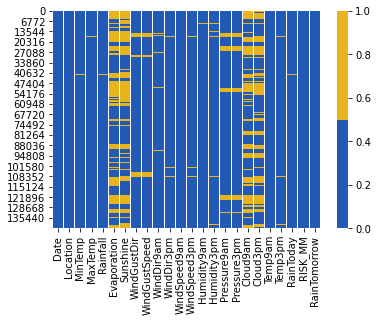

In [4]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#235AB5', '#E8B41E'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

Рассмотрим числовые колонки с пропущенными значениями:

In [13]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка MinTemp. Тип данных float64. Количество пустых значений 637, 0.45%.
Колонка MaxTemp. Тип данных float64. Количество пустых значений 322, 0.23%.
Колонка Rainfall. Тип данных float64. Количество пустых значений 1406, 0.99%.
Колонка Evaporation. Тип данных float64. Количество пустых значений 60843, 42.79%.
Колонка Sunshine. Тип данных float64. Количество пустых значений 67816, 47.69%.
Колонка WindGustSpeed. Тип данных float64. Количество пустых значений 9270, 6.52%.
Колонка WindSpeed9am. Тип данных float64. Количество пустых значений 1348, 0.95%.
Колонка WindSpeed3pm. Тип данных float64. Количество пустых значений 2630, 1.85%.
Колонка Humidity9am. Тип данных float64. Количество пустых значений 1774, 1.25%.
Колонка Humidity3pm. Тип данных float64. Количество пустых значений 3610, 2.54%.
Колонка Pressure9am. Тип данных float64. Количество пустых значений 14014, 9.86%.
Колонка Pressure3pm. Тип данных float64. Количество пустых значений 13981, 9.83%.
Колонка Cloud9am. Тип данных float

In [29]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1


/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nonpenguin/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


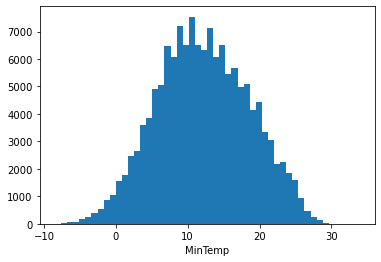

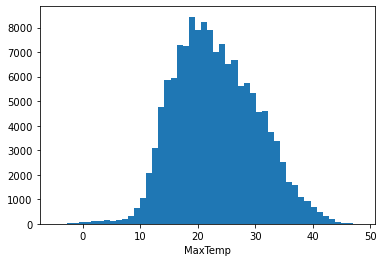

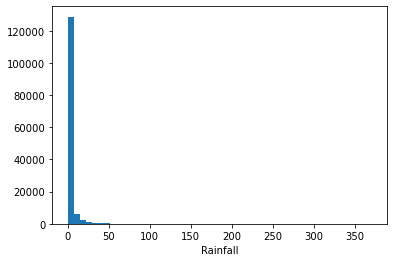

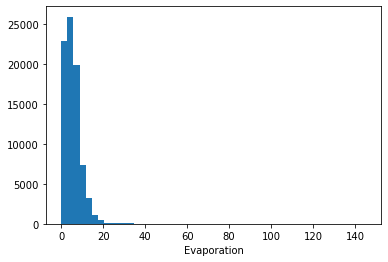

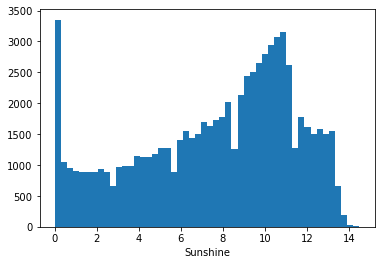

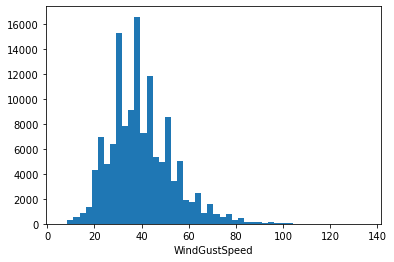

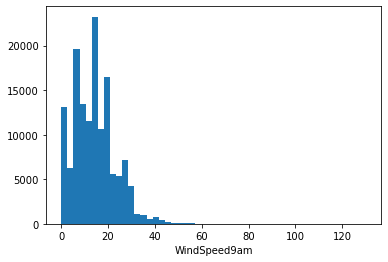

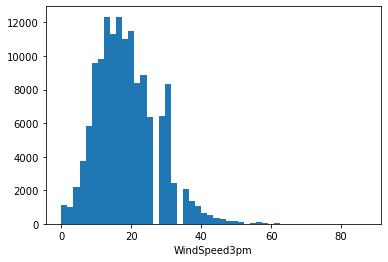

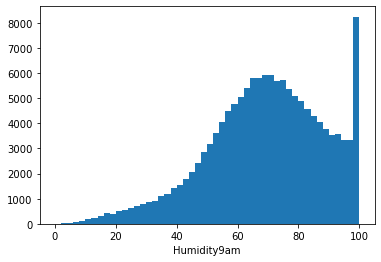

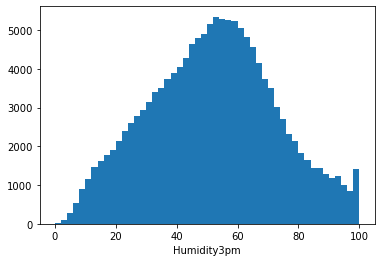

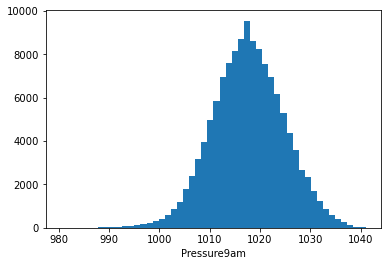

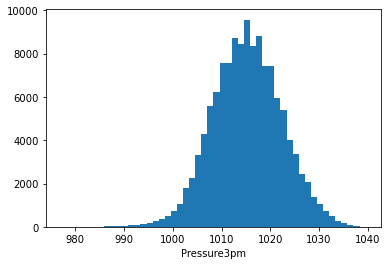

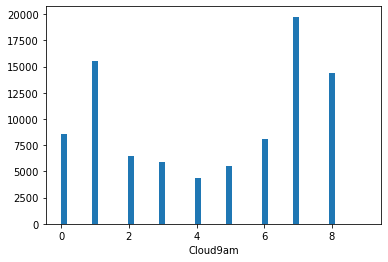

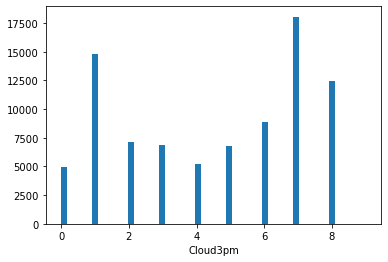

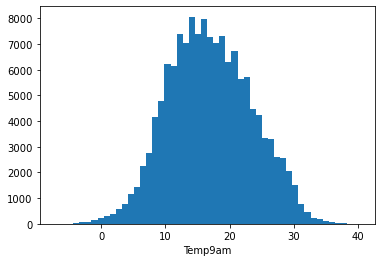

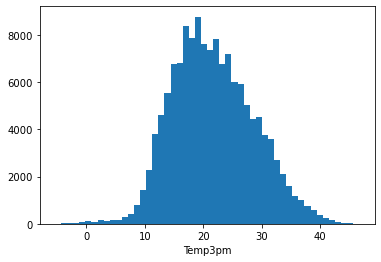

In [124]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

В столбце Evaporation 42.79% пропущенных данных, и его корреляция с целевым признаком низкая, так что легче всего этот столбец удалить.

In [3]:
data = data.drop(['Evaporation'], axis = 1)

Все распределения, кроме Sunshine, одномодальные, так что будем использовать для заполнения пропусков моду (уточни этот моментик потом). Для Sunshine медиану. 

In [4]:
data['Sunshine'] = data['Sunshine'].fillna(data.median())

In [5]:
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mode())

In [6]:
data = data.fillna(data.mode())

Рассмотрим пропуски в категориальных данных

In [152]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка WindGustDir. Тип данных object. Количество пустых значений 9330, 6.56%.
Колонка WindDir9am. Тип данных object. Количество пустых значений 10013, 7.04%.
Колонка WindDir3pm. Тип данных object. Количество пустых значений 3778, 2.66%.
Колонка RainToday. Тип данных object. Количество пустых значений 1406, 0.99%.


In [153]:
for col in data[cat_cols]:
    print('Колонка {}. {}'.format(col, data[col].unique()))

Колонка WindGustDir. ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
Колонка WindDir9am. ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Колонка WindDir3pm. ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Колонка RainToday. ['No' 'Yes' nan]


In [7]:
data[:] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        142193 non-null  float64       
 3   MaxTemp        142193 non-null  float64       
 4   Rainfall       142193 non-null  float64       
 5   Sunshine       142193 non-null  float64       
 6   WindGustDir    142193 non-null  object        
 7   WindGustSpeed  142193 non-null  float64       
 8   WindDir9am     142193 non-null  object        
 9   WindDir3pm     142193 non-null  object        
 10  WindSpeed9am   142193 non-null  float64       
 11  WindSpeed3pm   142193 non-null  float64       
 12  Humidity9am    142193 non-null  float64       
 13  Humidity3pm    142193 non-null  float64       
 14  Pressure9am    142193 non-null  float64       
 15  

In [8]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Кодирование категориальных признаков

In [8]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [136]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Слишком много категорий Location для OneHotEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])

In [10]:
categorical = ['WindDir3pm','WindDir9am', 'WindGustDir']

data = pd.concat([data, pd.get_dummies(data[categorical], columns=categorical, drop_first=True)],axis=1)
data.drop(categorical, axis=1, inplace=True)

In [160]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,733377,2,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,...,0,0,0,0,0,0,0,1,0,0
1,733378,2,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,...,0,0,0,0,0,0,0,0,1,0
2,733379,2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,...,0,0,0,0,0,0,0,0,0,1
3,733380,2,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,733381,2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,736500,41,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,...,0,0,0,0,0,0,0,0,0,0
142189,736501,41,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,...,0,0,0,0,0,0,0,0,0,0
142190,736502,41,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,...,1,0,0,0,0,0,0,0,0,0
142191,736503,41,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data.shape

(142193, 65)

Преобразуем дату

In [11]:
import datetime as dt

data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)

## Масштабирование данных

In [14]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data[:] = min_max_scaler.fit_transform(data)

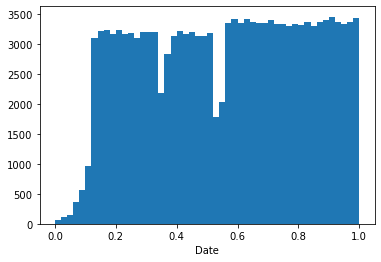

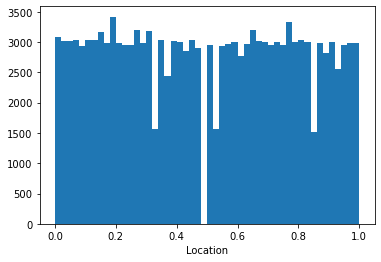

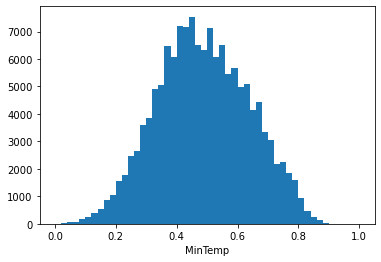

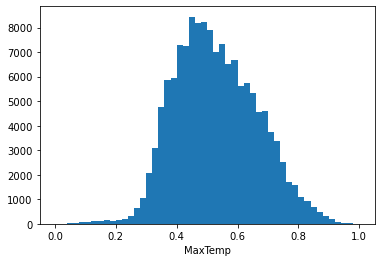

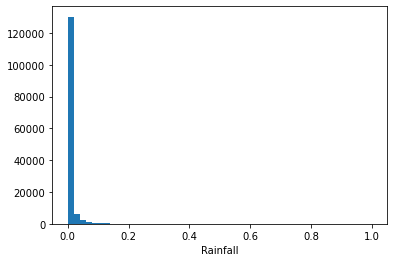

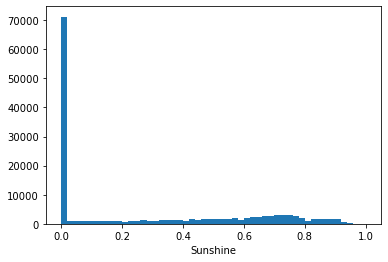

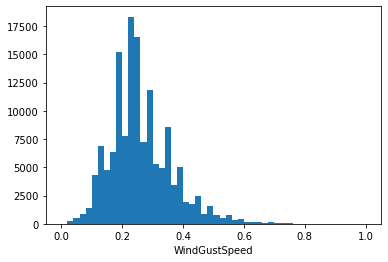

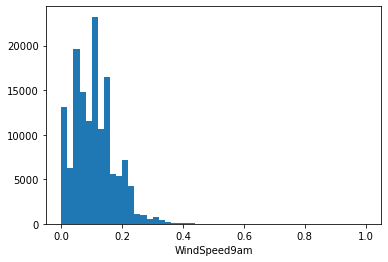

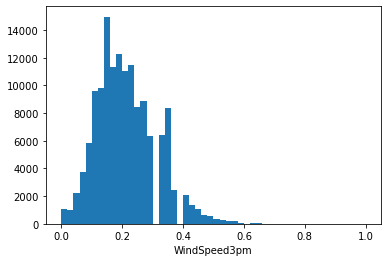

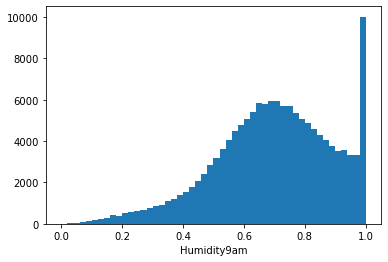

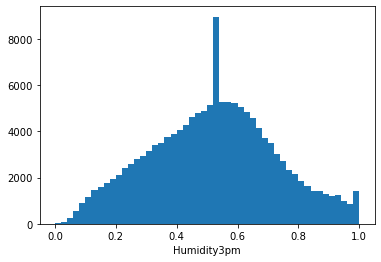

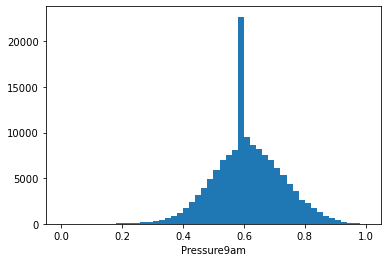

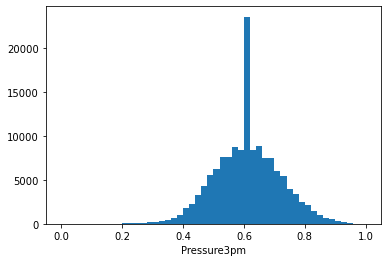

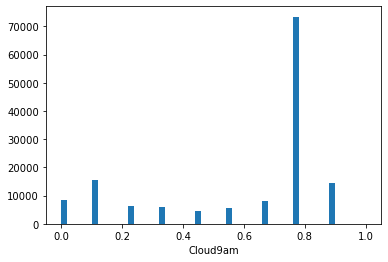

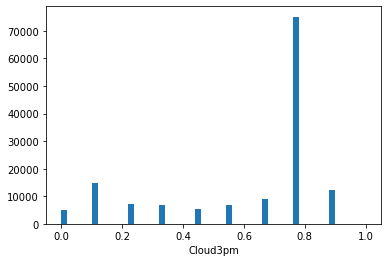

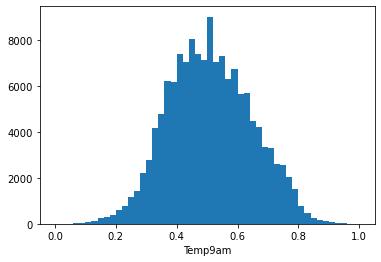

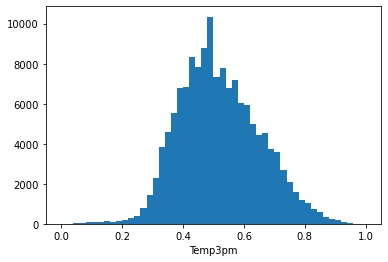

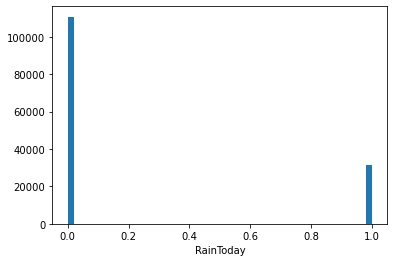

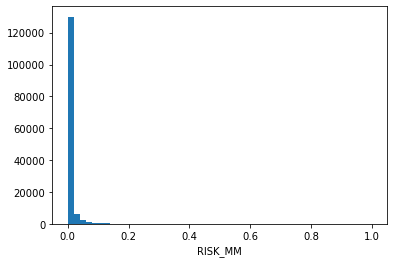

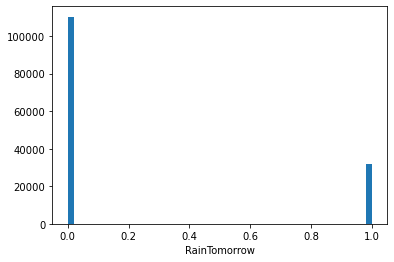

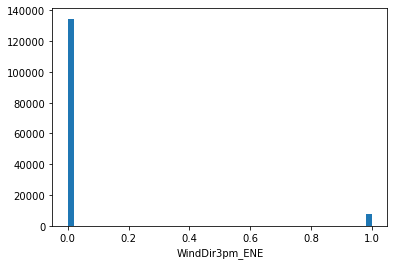

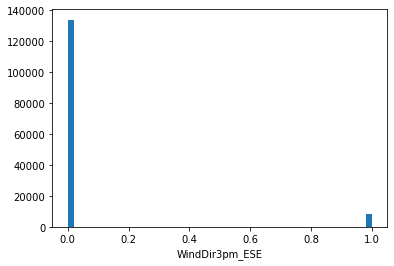

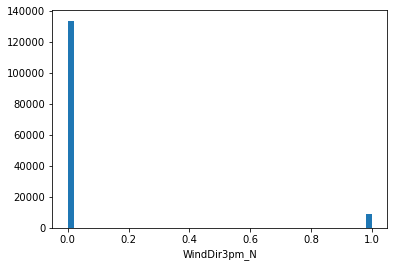

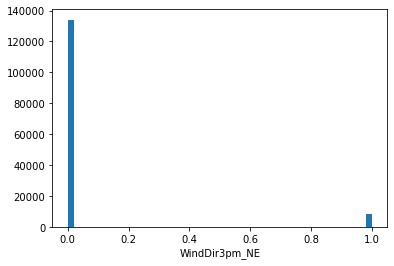

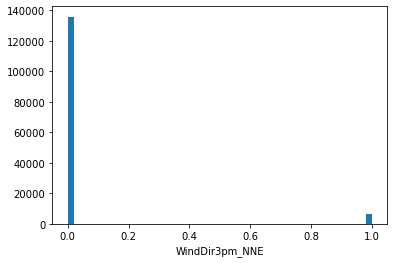

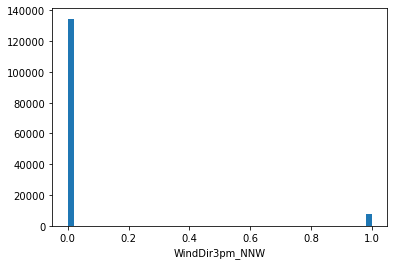

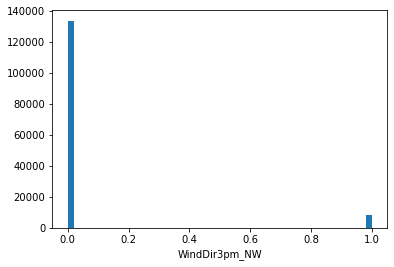

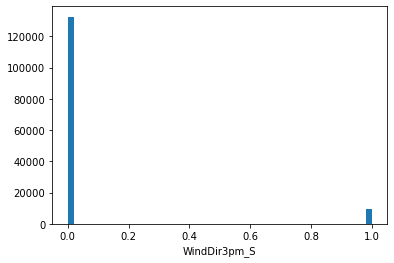

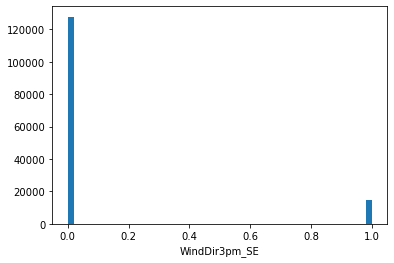

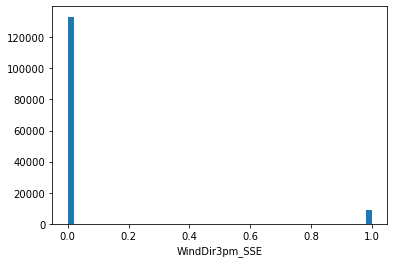

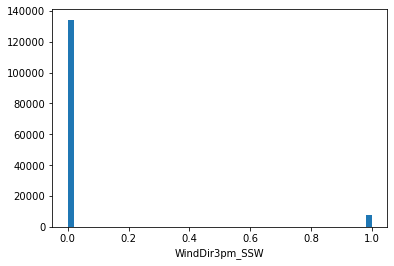

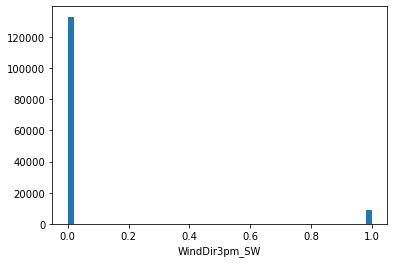

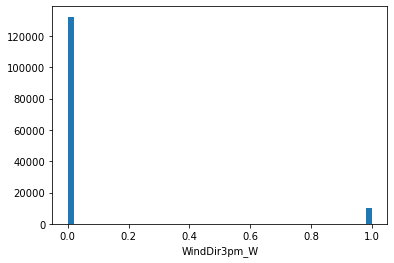

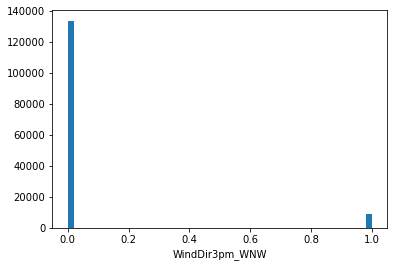

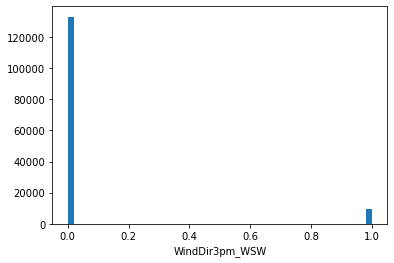

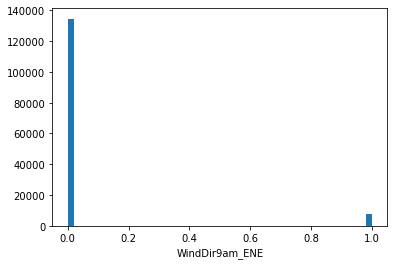

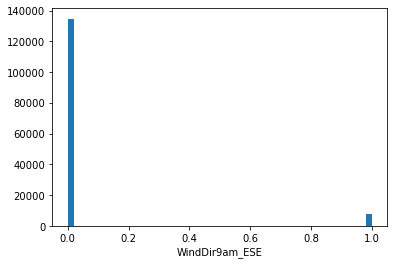

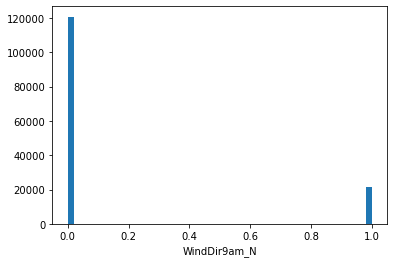

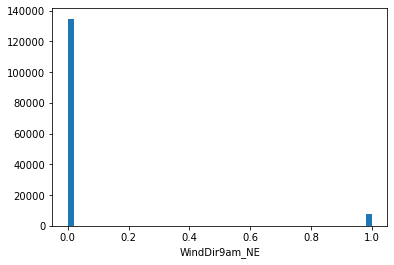

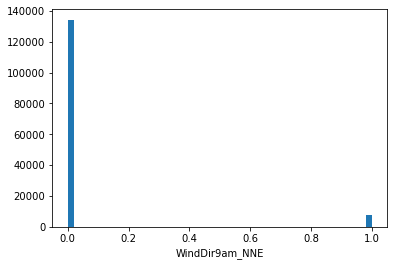

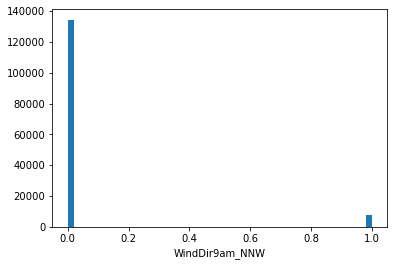

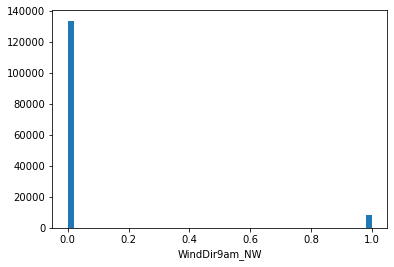

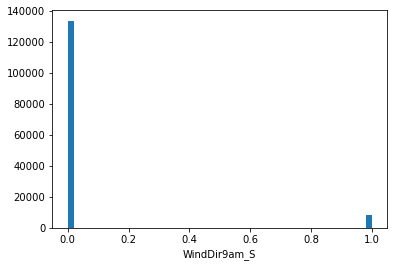

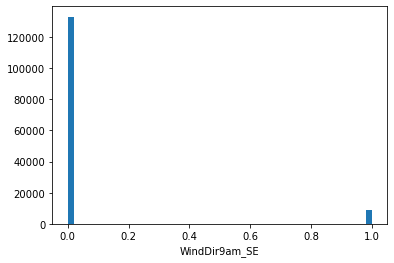

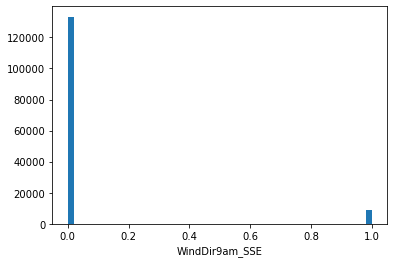

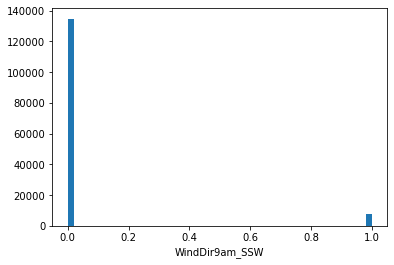

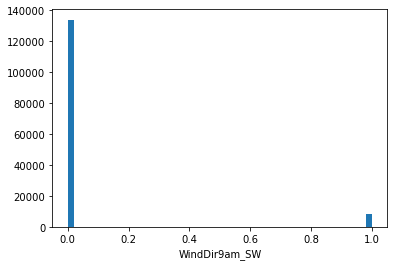

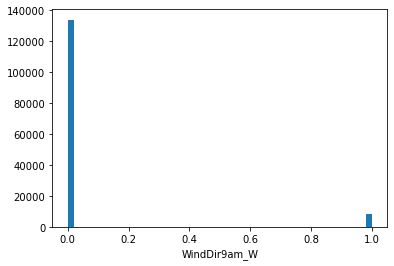

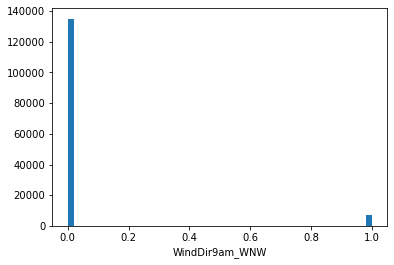

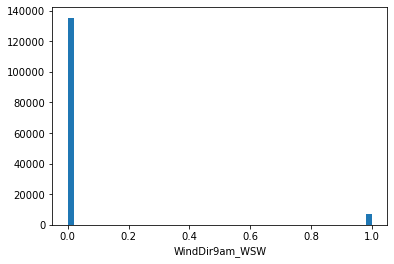

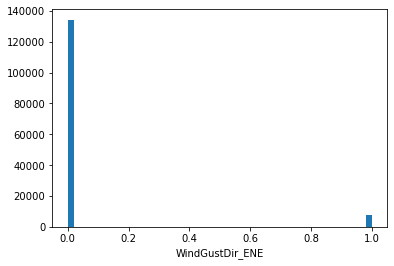

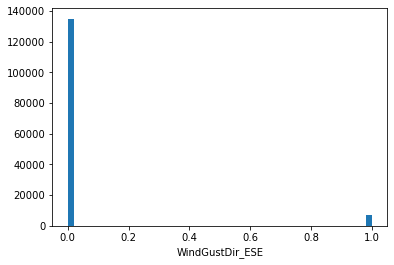

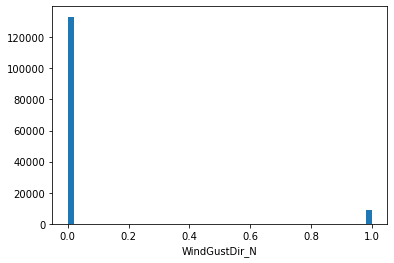

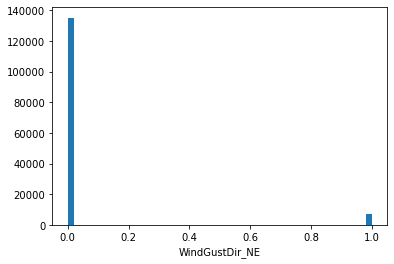

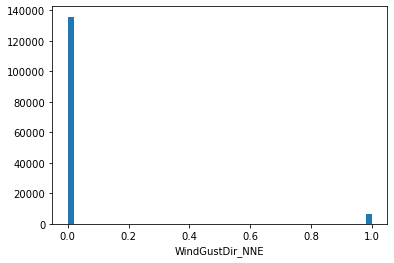

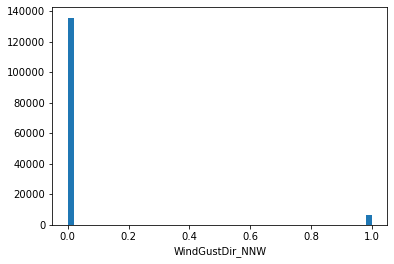

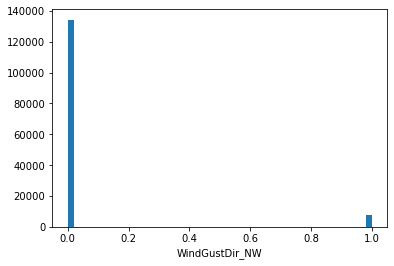

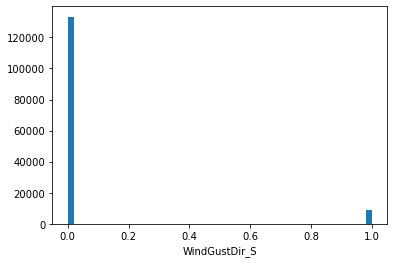

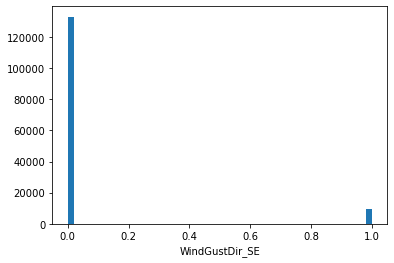

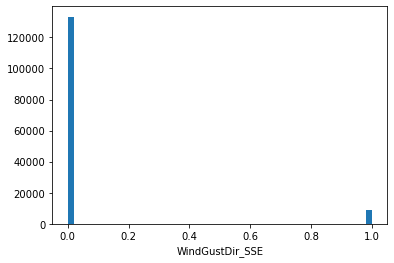

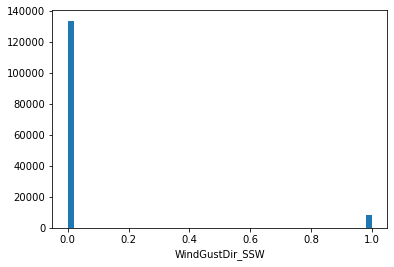

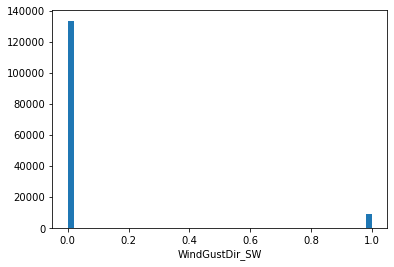

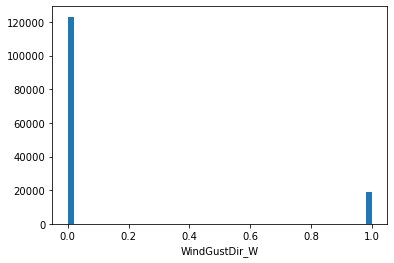

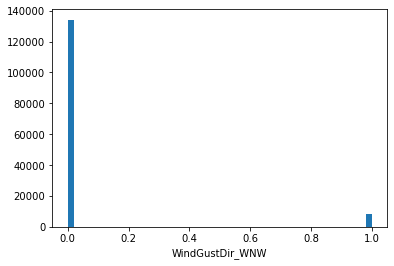

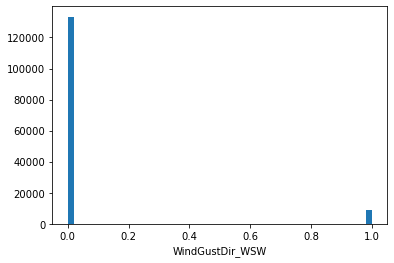

In [190]:
for col in data.columns:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

# Лабораторная №3
#### Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

#### Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.

## Разделение выборки на обучающую и тестовую

In [12]:
data = data.drop(['RISK_MM'], axis = 1)

In [13]:
y = data['RainTomorrow']
data.drop(['RainTomorrow'], axis = 1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,733377,2,13.4,22.9,0.6,0.0,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,733378,2,7.4,25.1,0.0,0.0,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,733379,2,12.9,25.7,0.0,0.0,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,0,1
3,733380,2,9.2,28.0,0.0,0.0,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,733381,2,17.5,32.3,1.0,0.0,41.0,7.0,20.0,82.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,736500,41,3.5,21.8,0.0,0.0,31.0,15.0,13.0,59.0,...,0,0,0,0,0,0,0,0,0,0
142189,736501,41,2.8,23.4,0.0,0.0,31.0,13.0,11.0,51.0,...,0,0,0,0,0,0,0,0,0,0
142190,736502,41,3.6,25.3,0.0,0.0,22.0,13.0,9.0,56.0,...,1,0,0,0,0,0,0,0,0,0
142191,736503,41,5.4,26.9,0.0,0.0,37.0,9.0,9.0,53.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=23)

## Модель ближайших соседей для произвольно заданного гиперпараметра K

Выберем K=5

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
%%time
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

CPU times: user 11.6 s, sys: 55 ms, total: 11.7 s
Wall time: 11.7 s


In [16]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
print ("balanced_accuracy_score = {}".format(balanced_accuracy_score(y_test, prediction)))  # бинарный признак
print ("precision_score = {}".format(precision_score(y_test, prediction)))
print ("recall_score = {}".format(recall_score(y_test, prediction)))
print ("f1_score = {}".format(f1_score(y_test, prediction)))

0.8261273172241131
balanced_accuracy_score = 0.6546730748378109
precision_score = 0.7208135235076598
recall_score = 0.34751050553928436
f1_score = 0.46894063063837105


In [36]:
classification_report(y_test, prediction, target_names=['rain','no rain'], output_dict=True)

{'rain': {'precision': 0.8386802254195133,
  'recall': 0.9618356441363374,
  'f1-score': 0.8960460149010242,
  'support': 27696},
 'no rain': {'precision': 0.7208135235076598,
  'recall': 0.34751050553928436,
  'f1-score': 0.46894063063837105,
  'support': 7853},
 'accuracy': 0.8261273172241131,
 'macro avg': {'precision': 0.7797468744635865,
  'recall': 0.6546730748378109,
  'f1-score': 0.6824933227696977,
  'support': 35549},
 'weighted avg': {'precision': 0.8126427219703647,
  'recall': 0.8261273172241131,
  'f1-score': 0.8016957214296294,
  'support': 35549}}

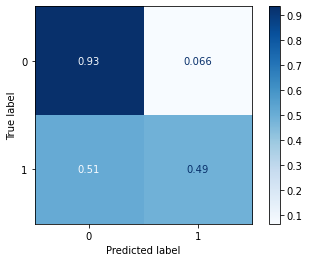

In [40]:
plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues, normalize='true') 

In [38]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

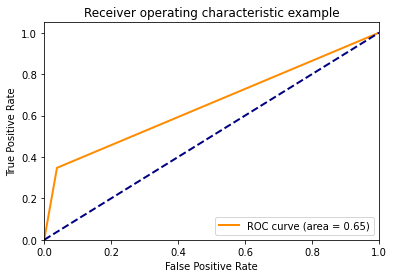

In [40]:
draw_roc_curve(y_test, prediction, pos_label=1, average='micro')

## Подбор гиперпараметра K

In [17]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

Оценка качества модели с использованием кросс-валидации

In [23]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=50), 
                         data, y, 
                         cv=5)
scores, np.mean(scores)

(array([0.8317803 , 0.82295439, 0.83353845, 0.83300513, 0.82962937]),
 0.8301815298322947)

Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации

In [22]:
n_range = np.array(range(5,45,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40])}]

In [23]:
%%time
clf_gs2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf_gs2.fit(data, y)

CPU times: user 5min 8s, sys: 1.18 s, total: 5min 9s
Wall time: 5min 9s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40])}])

In [24]:
clf_gs2.best_params_

{'n_neighbors': 25}

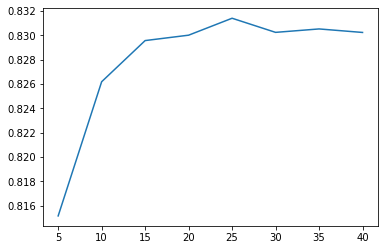

In [25]:
plt.plot(n_range, clf_gs2.cv_results_['mean_test_score'])

In [26]:
clf_gs2.best_estimator_.fit(X_train, y_train)
best_prefiction1 = clf_gs2.best_estimator_.predict(X_train)
best_prefiction2 = clf_gs2.best_estimator_.predict(X_test)

## Сравнение метрик качества исходной и оптимальной моделей

In [50]:
print ("balanced_accuracy_score = {}".format(balanced_accuracy_score(y_train, best_prefiction1)))  # бинарный признак
print ("precision_score = {}".format(precision_score(y_train, best_prefiction1)))
print ("recall_score = {}".format(recall_score(y_train, best_prefiction1)))
print ("f1_score = {}".format(f1_score(y_train, best_prefiction1)))

balanced_accuracy_score = 0.7045669472447322
precision_score = 0.745130890052356
recall_score = 0.453075257863237
f1_score = 0.5635096610706366


In [39]:
print ("accuracy_score = {}".format(accuracy_score(y_test, best_prefiction2)))
print ("balanced_accuracy_score = {}".format(balanced_accuracy_score(y_test, best_prefiction2)))  # бинарный признак
print ("precision_score = {}".format(precision_score(y_test, best_prefiction2)))
print ("recall_score = {}".format(recall_score(y_test, best_prefiction2)))
print ("f1_score = {}".format(f1_score(y_test, best_prefiction2)))

accuracy_score = 0.8434273819235422
balanced_accuracy_score = 0.690910610556056
precision_score = 0.7676105780482096
recall_score = 0.41767477397173053
f1_score = 0.5409863104073891


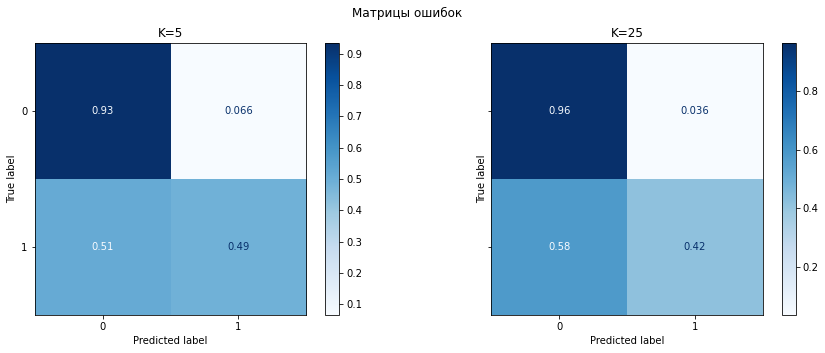

In [33]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues, normalize='true',  ax=ax[0]) 
plot_confusion_matrix(clf_gs2.best_estimator_, X_test, y_test, cmap=plt.cm.Blues, normalize='true',  ax=ax[1]) 

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=5')
ax[1].title.set_text('K=25')

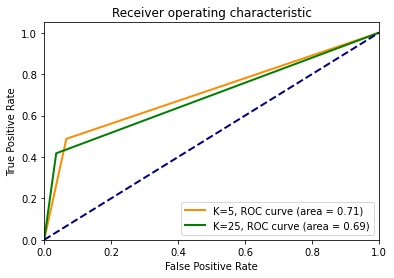

In [35]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, prediction, pos_label=1)
roc_auc_value5 = roc_auc_score(y_test, prediction, average='micro')

fpr25, tpr25, thresholds25 = roc_curve(y_test, best_prefiction2, pos_label=1)
roc_auc_value25 = roc_auc_score(y_test, best_prefiction2, average='micro')
plt.figure()
lw = 2
plt.plot(fpr5, tpr5, color='darkorange', lw=lw, label='K=5, ROC curve (area = %0.2f)' % roc_auc_value5)
plt.plot(fpr25, tpr25, color='green', lw=lw, label='K=25, ROC curve (area = %0.2f)' % roc_auc_value25)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
%%time

n_nb = range(1, 30)
res = []

for i in n_nb: 
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)

  prediction = neigh.predict(X_test)

  res.append((np.mean(prediction == y_test)))

CPU times: user 6min 20s, sys: 867 ms, total: 6min 21s
Wall time: 6min 21s


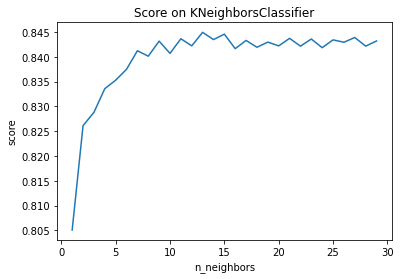

In [18]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

In [29]:
%%time
neigh13 = KNeighborsClassifier(n_neighbors=13)
neigh13.fit(X_train, y_train)

prediction13 = neigh13.predict(X_test)

0.8449464119947115
CPU times: user 13.8 s, sys: 56.3 ms, total: 13.9 s
Wall time: 13.9 s


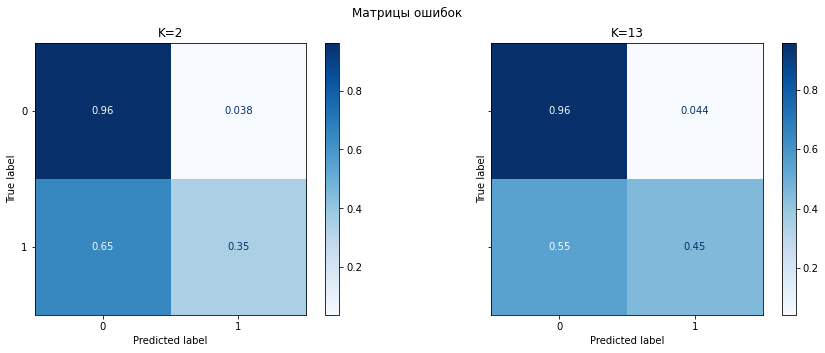

In [45]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues, normalize='true',  ax=ax[0]) 
plot_confusion_matrix(neigh13, X_test, y_test, cmap=plt.cm.Blues, normalize='true',  ax=ax[1]) 

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=5')
ax[1].title.set_text('K=13')

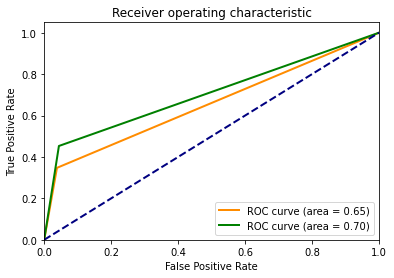

In [49]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, prediction, pos_label=1)
roc_auc_value1 = roc_auc_score(y_test, prediction, average='micro')

fpr2, tpr2, thresholds2 = roc_curve(y_test, prediction13, pos_label=1)
roc_auc_value2 = roc_auc_score(y_test, prediction13, average='micro')
plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='K=5, ROC curve (area = %0.2f)' % roc_auc_value1)
plt.plot(fpr2, tpr2, color='green', lw=lw, label='K=13, ROC curve (area = %0.2f)' % roc_auc_value2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()